<a href="https://colab.research.google.com/github/annuushhqaaa/Team8-220940325013_Anushka-Umbre/blob/main/Team_8_Module_Test_(Part_1)_AAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough)


##Importing all Require libraries for the case study:

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from scipy.stats import kurtosis
import scipy


# Importing Data Sets

In [ ]:
# 1. 'application_data.csv'  contains all the information of the client at the time of application.
#The data is about whether a client has payment difficulties.

df=pd.read_csv("application_data (1).csv")

In [ ]:
#2. 'previous_application.csv' contains information about the client’s previous loan data.
# It contains the data whether the previous application had been Approved, Canceled, Refused or Unused offer.

pa_df=pd.read_csv("previous_application.csv")

In [ ]:
#3. 'columns_description.csv' is a data dictionary which describes the meaning of the variables.

col_df=pd.read_csv("columns_description.csv", encoding='latin1')

###Viewing Data

In [ ]:
#checking first 5 rows of columns description data set
col_df.head()

In [ ]:
#Checking names of rows of all the data sets
col_df['Row']

0                     SK_ID_CURR
1                         TARGET
2             NAME_CONTRACT_TYPE
3                    CODE_GENDER
4                   FLAG_OWN_CAR
                 ...            
155               DAYS_FIRST_DUE
156    DAYS_LAST_DUE_1ST_VERSION
157                DAYS_LAST_DUE
158             DAYS_TERMINATION
159    NFLAG_INSURED_ON_APPROVAL
Name: Row, Length: 160, dtype: object

In [ ]:
#chaking shape of columns description data set
col_df.shape

(160, 5)

In [ ]:
#Displaying the column names, Non-Null Count in each column, and data type of respective column of dataframe using the function df.info
col_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [ ]:
#Cheking first 5 rows of application_data
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Cheking first 5 rows of previous_application data
pa_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#chcking shape of Application data
df.shape

(307511, 122)

In [ ]:
#checking Dimention of Application data
df.ndim

2

In [ ]:
#Checking last 5 rows of Application data
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [ ]:
#checking Data types for Application Data
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
#Checking the column names, Non-Null Count in each column, and data type of respective column of dataframe using the function df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112568 entries, 0 to 112567
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(21), object(16)
memory usage: 104.8+ MB


In [ ]:
#Gives statestical Description of continues data
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,112568.000000,112568.000000,112568.000000,1.125680e+05,1.125680e+05,112561.000000,1.124800e+05,112568.000000,112568.000000,112568.000000,...,112567.000000,112567.000000,112567.000000,112567.000000,97426.000000,97426.000000,97426.000000,97426.000000,97426.000000,97426.000000
mean,165299.106735,0.081506,0.417916,1.693523e+05,5.988978e+05,27093.243721,5.382569e+05,0.020857,-16031.682174,63559.335913,...,0.008271,0.000640,0.000515,0.000311,0.006672,0.007236,0.033656,0.267085,0.266140,1.892185
std,37695.825512,0.273612,0.721349,3.633325e+05,4.022424e+05,14529.828326,3.696342e+05,0.013828,4368.315130,141062.951776,...,0.090567,0.025283,0.022693,0.017630,0.086423,0.109394,0.203198,0.917826,0.613627,1.872578
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132708.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16488.000000,2.385000e+05,0.010006,-19676.000000,-2759.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,165224.500000,0.000000,0.000000,1.440000e+05,5.124465e+05,24885.000000,4.500000e+05,0.018850,-15744.500000,-1217.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,197943.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12393.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,230577.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000,8.000000,24.000000,8.000000,25.000000


In [ ]:
#Gives statestical Description of all columns including catorgerical data
df.describe(include='all')


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


##Replacing null values 
###TO deal with missing data?

Drop data:

        a. Drop the whole row

        b. Drop the whole column
 
Replace data

        a. Replace it by mean
        
        b. Replace it by frequency
        
        c. Replace it based on other functions

##Checking for null values in columns

In [ ]:
#Percentage of missing values for all columns 
null_count=round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)
null_count


COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_HOUSING_TYPE            0.00
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [ ]:
#Columns with high missing percentage >=50%
null_count=null_count[null_count>=50]
null_count

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_AVG           55.18
NONLIVINGAREA_MEDI          55.18
ELEVATORS_MEDI              53.30
ELEVATORS_AVG               53.30
ELEVATORS_MODE

In [ ]:
len(null_count)
#Thus, here we can see that there are 41 columns having the  missing percentage( >=50%) So here we remove those columns

41

#Remove Columns having the  missing percentage( >=50%)

In [ ]:
#Removing those 41 columns which have missing values more than 50%
cols_dropped=([null_count[null_count >=50.00].index])
new_df=df.drop(labels=cols_dropped[0],axis=1)

In [ ]:
#checking new df
new_df.shape

(307511, 81)

In [ ]:
# Checking the columns after removing high missing values(>=50%)

round((new_df.isnull().sum()*100/len(new_df)).sort_values(ascending = False),2)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
                                ...  
NAME_HOUSING_TYPE                0.00
NAME_FAMILY_STATUS               0.00
NAME_EDUCATION_TYPE              0.00
NAME_INCOME_TYPE                 0.00
SK_ID_CURR                       0.00
Length: 81, dtype: float64

In [ ]:
# Drop unnecessary columns from the dataset

Drop_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI']

new_df.drop(labels=Drop_col,axis=1,inplace=True)

In [ ]:
#Checking shape of new_df after dropping the columns
new_df.shape

(307511, 42)

In [ ]:
new_df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,1.422245,0.143421,1.405292,0.100049,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,2.400989,0.446698,2.379803,0.362291,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [ ]:
# Checking the columns after dropping unncessary columns

100*(new_df.isnull().sum()/len(new_df.index)).sort_values(ascending = False)

OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
AMT_INCOME_TOTAL                0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
CNT_CHILDREN                    0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TY

##following columns are having null values so we will calculate Mean, Medain and mode for the same.
OCCUPATION_TYPE                31.345545

AMT_REQ_CREDIT_BUREAU_HOUR     13.501631

AMT_REQ_CREDIT_BUREAU_QRT      13.501631

AMT_REQ_CREDIT_BUREAU_MON      13.501631

AMT_REQ_CREDIT_BUREAU_WEEK     13.501631

AMT_REQ_CREDIT_BUREAU_DAY      13.501631

AMT_REQ_CREDIT_BUREAU_YEAR     13.501631

NAME_TYPE_SUITE                 0.420148

DEF_30_CNT_SOCIAL_CIRCLE        0.332021

OBS_30_CNT_SOCIAL_CIRCLE        0.332021

DEF_60_CNT_SOCIAL_CIRCLE        0.332021

OBS_60_CNT_SOCIAL_CIRCLE        0.332021

EXT_SOURCE_2                    0.214626

AMT_GOODS_PRICE                 0.090403

AMT_ANNUITY                     0.003902

###Notice that there are columns having almost 31%, 13% etc. missing values. When dealing with columns, you have two simple choices - either delete or retain the column. If you retain the column, you'll have to treat (i.e. delete or impute) the rows having missing values.

If you delete the missing rows, you lose data. If you impute, you introduce bias.

##Checking unique values for catogorical columns and Visualizing data

#Target variable
(1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


In [ ]:
#unique value Target
new_df.TARGET.unique()

array([1, 0])

In [ ]:
#count of unique value Target
v=new_df.TARGET.value_counts()
v

0    192573
1     18547
Name: TARGET, dtype: int64

<BarContainer object of 2 artists>

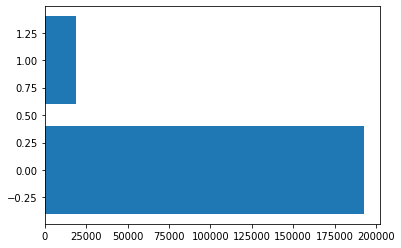

In [ ]:
plt.barh(v.index, v)

##Calculating Imbalance percentage using Target Variable

([<matplotlib.patches.Wedge at 0x7fd6269397f0>,
 [Text(-1.0583713280937648, 0.2997501157114721, '0'),
  Text(1.0583713280937646, -0.2997501157114727, '1')],
 [Text(-0.577293451687508, 0.1635000631153484, '91.21%'),
  Text(0.5772934516875078, -0.16350006311534873, '8.79%')])

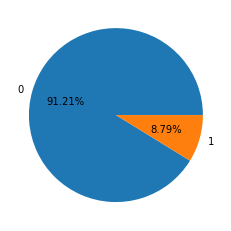

In [ ]:
plt.pie(x=v, labels=v.index, autopct='%1.2f%%')

#It shows that 8.79% people do not repay there loan

##NAME_INCOME_TYPE

In [ ]:
#unique value INCOME_TYPE
new_df.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Student',
       'Businessman', 'Pensioner', 'Maternity leave'], dtype=object)

In [ ]:
#count of unique value INCOME_TYPE   
a=new_df.NAME_INCOME_TYPE.value_counts()
a

Working                 133854
Commercial associate     59320
State servant            17916
Student                     13
Businessman                  8
Pensioner                    5
Maternity leave              4
Name: NAME_INCOME_TYPE, dtype: int64

<BarContainer object of 7 artists>

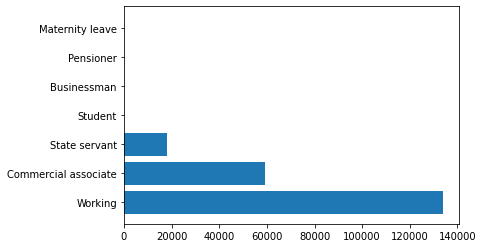

In [ ]:
plt.barh(a.index, a)

#here we see that most number of people who take Loan fall under Income_type (occupation)==>Working (133854), Commercial associate (59320),
#Pensioner (8), State servant (17916)

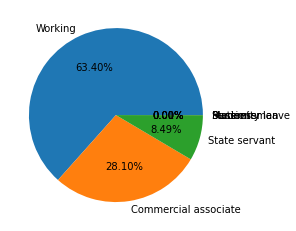

<Figure size 1440x1440 with 0 Axes>

In [ ]:
#Showcasing  Income_type typr of people along with there Percentage w.r.t total number of people taking loan
plt.pie(x=a, labels=a.index, autopct='%1.2f%%')


plt.figure(figsize = [20,20])
plt.show()

##NAME_EDUCATION_TYPE


In [ ]:
new_df.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
b=new_df.NAME_EDUCATION_TYPE.value_counts()
b
#maximum people who take loan are having Education asSecondary / secondary special with count of 218391

Secondary / secondary special    147056
Higher education                  54137
Incomplete higher                  7911
Lower secondary                    1909
Academic degree                     107
Name: NAME_EDUCATION_TYPE, dtype: int64

<BarContainer object of 5 artists>

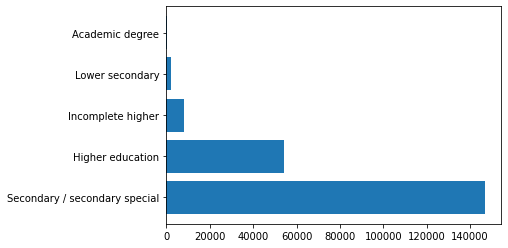

In [ ]:
plt.barh(b.index, b)

In [ ]:
plt.pie(x=b, labels=b.index, autopct='%1.2f%%')

plt.show()

###NAME_FAMILY_STATUS


In [ ]:
new_df.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [ ]:
c=new_df.NAME_FAMILY_STATUS.value_counts()
c

Married                 138000
Single / not married     32451
Civil marriage           21981
Separated                13239
Widow                     5447
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

<BarContainer object of 6 artists>

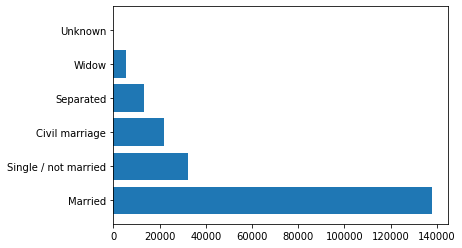

In [ ]:
plt.barh(c.index, c)

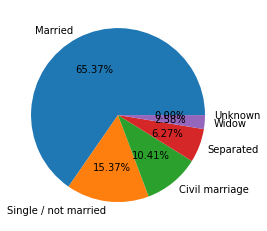

In [ ]:
plt.pie(x=c, labels=c.index, autopct='%1.2f%%')

plt.show()

#NAME_HOUSING_TYPE


In [ ]:
new_df.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [ ]:
d=new_df.NAME_HOUSING_TYPE.value_counts()
d

House / apartment      184685
With parents            12177
Municipal apartment      7550
Rented apartment         3970
Office apartment         1893
Co-op apartment           845
Name: NAME_HOUSING_TYPE, dtype: int64

<BarContainer object of 6 artists>

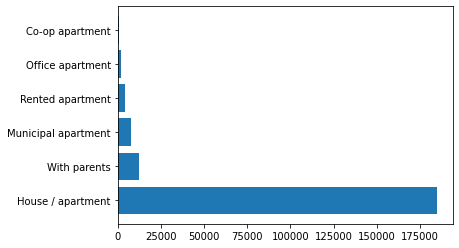

In [ ]:
plt.barh(d.index, d)

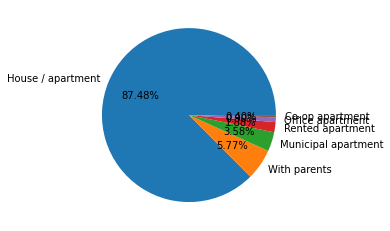

In [ ]:
plt.pie(x=d, labels=d.index, autopct='%1.2f%%')

plt.show()

##ORGANIZATION_TYPE


In [ ]:
new_df.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'Electricity', 'Medicine', 'Business Entity Type 2',
       'Self-employed', 'Transport: type 2', 'Construction', 'Housing',
       'Kindergarten', 'Trade: type 7', 'Industry: type 11', 'Services',
       'Security Ministries', 'Transport: type 4', 'Industry: type 1',
       'Security', 'Trade: type 2', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Agriculture', 'Restaurant',
       'Culture', 'Trade: type 3', 'Industry: type 3', 'Hotel',
       'Military', 'Industry: type 9', 'Insurance', 'Bank',
       'Trade: type 6', 'Industry: type 2', 'University',
       'Transport: type 1', 'Industry: type 12', 'Industry: type 4',
       'Industry: type 7', 'Emergency', 'Mobile', 'Trade: type 1',
       'Industry: type 5', 'Industry: type 10', 'Legal Services',
       'Advertising', 'Trade: type 5', 'Cleaning', 'Industry: type 13',
       'Trade: type 4', 'Telecom', 'Industry: type 

In [ ]:
new_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    53655
Self-employed             34867
Other                     11491
Medicine                  10120
Government                 8321
Business Entity Type 2     8288
School                     7450
Trade: type 7              7398
Kindergarten               6382
Construction               6069
Business Entity Type 1     4674
Transport: type 4          4463
Trade: type 3              3254
Security                   3013
Industry: type 9           2843
Industry: type 3           2840
Housing                    2541
Bank                       2274
Industry: type 11          2181
Military                   2084
Police                     2084
Agriculture                2084
Postal                     2078
Transport: type 2          1921
Trade: type 2              1799
Restaurant                 1647
Security Ministries        1490
Services                   1455
Transport: type 3          1171
Industry: type 7           1092
University                 1021
Industry

##OCCUPATION_TYPE

In [ ]:
#OCCUPATION_TYPE(What kind of occupation does the client have) is catogorical so we will check it by using Unique value function
new_df.OCCUPATION_TYPE.unique()


array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [ ]:
#Here 'OCCUPATION_TYPE' is also a categorical variable, has about 31.3% of missing values. So here we can impute the missing values with the most popular category which is "Laborers"
new_df.OCCUPATION_TYPE.mode()


0    Laborers
dtype: object

In [ ]:
#AS OCCUPATION_TYPE is important factor in this analysis so If you impute it , we will introduce bias so we replace null values with NAN

# simply drop whole row with NaN in "new_df" column
new_df.dropna(subset=["OCCUPATION_TYPE"], axis=0, inplace=True)

# reset index, because we droped two rows
new_df.reset_index(drop=True, inplace=True)

In [ ]:
new_df.shape

(211120, 42)

##AMT_REQ_CREDIT_BUREAU_WEEK

In [ ]:
#We will check for AMT_REQ_CREDIT_BUREAU_WEEK(Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)

new_df.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    182823.000000
mean          0.033902
std           0.202892
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [ ]:
new_df.AMT_REQ_CREDIT_BUREAU_WEEK.unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  8.,  7.])

In [ ]:
new_df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()


0.0    177037
1.0      5554
2.0       147
3.0        40
4.0        19
6.0        14
5.0         8
8.0         2
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [ ]:
#new_df.AMT_REQ_CREDIT_BUREAU_WEEK is having catororical values so we will replace null values with mode. i.e frequent value in column
mode_of_AMT_REQ_CREDIT_BUREAU_WEEK=new_df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

###NAME_TYPE_SUITE

In [ ]:
#we will check for unique values 
new_df.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Other_A', nan,
       'Children', 'Group of people', 'Other_B'], dtype=object)

In [ ]:
#checking for count for unique values
suite=new_df.NAME_TYPE_SUITE.value_counts()
suite

Unaccompanied      171484
Family              26659
Spouse, partner      8144
Children             1878
Other_B              1245
Other_A               618
Group of people       185
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
# AS NAME_TYPE_SUITE is catogorical variable we can replace its null values with its Mode i.e. Unaccompanied
new_df.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

([<matplotlib.patches.Wedge at 0x7fd628dc39d0>,
 [Text(-0.9208331909253873, 0.6017193984659039, 'Unaccompanied'),
  Text(0.7979397914964089, -0.7571605438390644, 'Family'),
  Text(1.0687178204734697, -0.2604653915637101, 'Spouse, partner'),
  Text(1.095618873984318, -0.09807794333760927, 'Children'),
  Text(1.0990016723410594, -0.046854286800191706, 'Other_B'),
  Text(1.0998800908293487, -0.016241483836890596, 'Other_A'),
  Text(1.0999957956088429, -0.003041322552626202, 'Group of people')],
 [Text(-0.5022726495956658, 0.32821058098140216, '81.58%'),
  Text(0.43523988627076843, -0.41299666027585324, '12.68%'),
  Text(0.5829369929855288, -0.14207203176202368, '3.87%'),
  Text(0.5976102949005371, -0.05349706000233233, '0.89%'),
  Text(0.5994554576405778, -0.025556883709195472, '0.59%'),
  Text(0.5999345949978265, -0.008858991183758507, '0.29%'),
  Text(0.5999977066957324, -0.001658903210523383, '0.09%')])

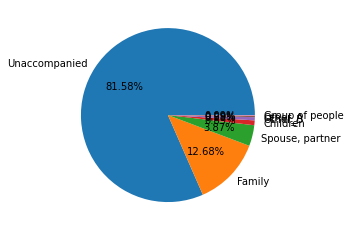

In [ ]:
#We will visulize it using pie chart

plt.pie(x=suite, labels=suite.index, autopct='%1.2f%%')

#It shows that 8.15% people do not repay there loan


###Unaccompanied are 81.58% which is larges amongst all

##AMT_GOODS_PRICE 

In [ ]:
#AS AMT_GOODS_PRICE is continues data we can check for mean, median and mode and replace null values with approprite one
new_df.AMT_GOODS_PRICE.describe()

count    2.108990e+05
mean     5.481799e+05
std      3.723453e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      6.885000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
#as mean and and Median values differ by large amount so we can prefer to replace null values with mode (450000.0) which is coming out to be close to median (450000.0)
mode_GOODS_PRICE=new_df.AMT_GOODS_PRICE.mode()
mode_GOODS_PRICE

0    450000.0
dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


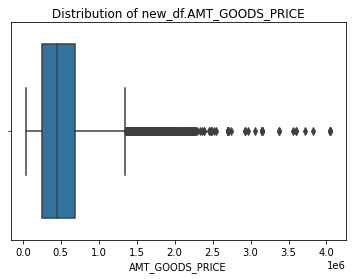

In [ ]:
sns.boxplot(new_df.AMT_GOODS_PRICE)
plt.title('Distribution of new_df.AMT_GOODS_PRICE')
plt.show()


In [ ]:
#cheking shape of new data, we have now reduced our no of columns from 122 to 30
new_df.shape

(211120, 42)

In [ ]:
#checking names of columns of new data
new_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MO

In [ ]:
#checking duplicate rows in a data set
new_df.duplicated().sum()

0

##DAYS_BIRTH

In [ ]:
#changing negative ages to positive ages.
new_df['DAYS_BIRTH']=abs(new_df['DAYS_BIRTH'])
new_df['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

##DAYS_EMPLOYED

In [ ]:
#changing negative values in days to positive days
new_df['DAYS_EMPLOYED']=abs(new_df['DAYS_EMPLOYED'])
new_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

##DAYS_REGISTRATION

In [ ]:
#changing negative days to positive days.
new_df['DAYS_REGISTRATION']=abs(new_df['DAYS_REGISTRATION'])
new_df['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

##DAYS_ID_PUBLISH

In [ ]:
#changing negative days to positive 
new_df['DAYS_ID_PUBLISH']=abs(new_df['DAYS_ID_PUBLISH'])
new_df['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

##REG_REGION_NOT_LIVE_REGION

In [ ]:
#converting the data type of categorical column
new_df['REG_REGION_NOT_LIVE_REGION'] = new_df['REG_REGION_NOT_LIVE_REGION'].astype(object)
new_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION      object
REG_REGION_NOT_WORK_REGIO

##Changing Data Types

In [ ]:
#REG_REGION_NOT_WORK_REGION::Flag if client's permanent address does not match work address (1=different, 0=same, at region level)

new_df.REG_REGION_NOT_WORK_REGION.unique()

array([0, 1], dtype=object)

In [ ]:
#Changing region from int to object
new_df['REG_REGION_NOT_WORK_REGION'] = new_df['REG_REGION_NOT_WORK_REGION'].astype(object)

In [ ]:
#LIVE_REGION_NOT_WORK_REGION::LIVE_REGION_NOT_WORK_REGION:Flag if client's contact address does not match work address (1=different, 0=same, at region level)
new_df.LIVE_REGION_NOT_WORK_REGION.unique()

array([0, 1])

In [ ]:
#Changing region from int to object
new_df['LIVE_REGION_NOT_WORK_REGION'] = new_df['LIVE_REGION_NOT_WORK_REGION'].astype(object)

In [ ]:
#REG_CITY_NOT_LIVE_CITY::Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)

new_df.REG_CITY_NOT_LIVE_CITY.unique()

array([0, 1])

In [ ]:
#Changing city from int to object
new_df['REG_CITY_NOT_LIVE_CITY'] = new_df['REG_CITY_NOT_LIVE_CITY'].astype(object)

In [ ]:
#REG_CITY_NOT_WORK_CITY::Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
new_df.REG_CITY_NOT_WORK_CITY.unique()

array([0, 1])

In [ ]:
#Changing city from int to object
new_df['REG_CITY_NOT_WORK_CITY'] = new_df['REG_CITY_NOT_WORK_CITY'].astype(object)

In [ ]:
#LIVE_CITY_NOT_WORK_CITY::Flag if client's contact address does not match work address (1=different, 0=same, at city level)
new_df.LIVE_CITY_NOT_WORK_CITY.unique()

array([0, 1])

In [ ]:
#Changing city from int to object
new_df['LIVE_CITY_NOT_WORK_CITY']=new_df['LIVE_CITY_NOT_WORK_CITY'].astype(object)

###Understanding the Categorical variables

In [ ]:
#taking info to check Column name,  Non-Null Count, Dtype and shape of data (211120 X 42 )
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211120 entries, 0 to 211119
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   211120 non-null  int64  
 1   TARGET                       211120 non-null  int64  
 2   NAME_CONTRACT_TYPE           211120 non-null  object 
 3   CODE_GENDER                  211120 non-null  object 
 4   FLAG_OWN_CAR                 211120 non-null  object 
 5   FLAG_OWN_REALTY              211120 non-null  object 
 6   CNT_CHILDREN                 211120 non-null  int64  
 7   AMT_INCOME_TOTAL             211120 non-null  float64
 8   AMT_CREDIT                   211120 non-null  float64
 9   AMT_ANNUITY                  211108 non-null  float64
 10  AMT_GOODS_PRICE              210899 non-null  float64
 11  NAME_TYPE_SUITE              210213 non-null  object 
 12  NAME_INCOME_TYPE             211120 non-null  object 
 13 

In [ ]:
# WE can check the number of unique values in a column
# If the number of unique values <=60: we say Categorical column
# If the number of unique values in a columns> 60: Continuous column

new_df.nunique().sort_values()

REG_REGION_NOT_LIVE_REGION          2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_NOT_WORK_REGION         2
REG_REGION_NOT_WORK_REGION          2
CODE_GENDER                         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    7
NAME_TYPE_SUITE                     7
AMT_REQ_CREDIT_BUREAU_DAY           8
DEF_60_CNT_SOCIAL_CIRCLE            8
DEF_30_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_YEAR         22
AMT_REQ_CRED

#### If the number of unique values in a columns> 60: we call it as Continuous data column (so following is list of same)
REGION_POPULATION_RELATIVE         81

AMT_GOODS_PRICE                   825

AMT_INCOME_TOTAL                 2016

AMT_CREDIT                       5102

DAYS_ID_PUBLISH                  6117

DAYS_EMPLOYED                   12185

AMT_ANNUITY                     12750

DAYS_REGISTRATION               14130

DAYS_BIRTH                      16281

EXT_SOURCE_2                   101730

SK_ID_CURR                     211120

In [ ]:
#createing new df considering only Continues data
new_con_df=new_df[['TARGET','REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_ID_PUBLISH','DAYS_EMPLOYED','AMT_ANNUITY','DAYS_REGISTRATION','DAYS_BIRTH','EXT_SOURCE_2','SK_ID_CURR']]

In [ ]:
new_con_df.head()

,TARGET,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_ANNUITY,DAYS_REGISTRATION,DAYS_BIRTH,EXT_SOURCE_2,SK_ID_CURR
0,1,0.018801,351000.0,202500.0,406597.5,-2120,637,24700.5,3648.0,9461,0.262949,100002
1,0,0.003541,1129500.0,270000.0,1293502.5,-291,1188,35698.5,1186.0,16765,0.622246,100003
2,0,0.010032,135000.0,67500.0,135000.0,-2531,225,6750.0,4260.0,19046,0.555912,100004
3,0,0.008019,297000.0,135000.0,312682.5,-2437,3039,29686.5,9833.0,19005,0.650442,100006
4,0,0.028663,513000.0,121500.0,513000.0,-3458,3038,21865.5,4311.0,19932,0.322738,100007


##Checking statisticsal summary of all the columns


In [ ]:
#statistical summary of new_con_df
new_con_df.describe()

,TARGET,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_ANNUITY,DAYS_REGISTRATION,DAYS_BIRTH,EXT_SOURCE_2,SK_ID_CURR
count,211120.000000,211120.000000,2.108990e+05,2.111200e+05,2.111200e+05,211120.000000,211120.000000,211108.000000,211120.000000,211120.000000,2.107080e+05,211120.000000
mean,0.087851,0.020705,5.481799e+05,1.757752e+05,6.103016e+05,-2804.761486,2380.896713,27793.198221,4625.461633,14763.481778,5.156045e-01,278221.563182
std,0.283078,0.013654,3.723453e+05,2.751414e+05,4.057490e+05,1515.406698,2587.306179,14622.071200,3242.148875,3643.724281,1.898690e-01,102823.536493
min,0.000000,0.000290,4.050000e+04,2.565000e+04,4.500000e+04,-7197.000000,0.000000,1980.000000,0.000000,7489.000000,8.173617e-08,100002.000000
25%,0.000000,0.010006,2.475000e+05,1.125000e+05,2.779695e+05,-4181.000000,767.000000,17077.500000,1841.000000,11789.000000,3.975931e-01,189166.750000
50%,0.000000,0.018850,4.500000e+05,1.575000e+05,5.212800e+05,-2892.000000,1641.000000,25836.750000,4257.000000,14574.500000,5.664851e-01,278226.500000
75%,0.000000,0.028663,6.885000e+05,2.115000e+05,8.248230e+05,-1492.000000,3164.000000,35586.000000,6940.000000,17541.000000,6.630799e-01,367366.500000
max,1.000000,0.072508,4.050000e+06,1.170000e+08,4.050000e+06,0.000000,365243.000000,258025.500000,22928.000000,25200.000000,8.549997e-01,456255.000000


In [ ]:
new_con_df.head()

,TARGET,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_ANNUITY,DAYS_REGISTRATION,DAYS_BIRTH,EXT_SOURCE_2,SK_ID_CURR
0,1,0.018801,351000.0,202500.0,406597.5,2120,637,24700.5,3648.0,9461,0.262949,100002
1,0,0.003541,1129500.0,270000.0,1293502.5,291,1188,35698.5,1186.0,16765,0.622246,100003
2,0,0.010032,135000.0,67500.0,135000.0,2531,225,6750.0,4260.0,19046,0.555912,100004
3,0,0.008019,297000.0,135000.0,312682.5,2437,3039,29686.5,9833.0,19005,0.650442,100006
4,0,0.028663,513000.0,121500.0,513000.0,3458,3038,21865.5,4311.0,19932,0.322738,100007


#Correlation cloumns of numric data

In [ ]:
#checking correlation between columns of numeric data(new_con_df)
new_con_df=new_df[['TARGET','REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_ID_PUBLISH','DAYS_EMPLOYED','AMT_ANNUITY','DAYS_REGISTRATION','DAYS_BIRTH','EXT_SOURCE_2','SK_ID_CURR']]
new_con_df.corr()

,TARGET,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_ANNUITY,DAYS_REGISTRATION,DAYS_BIRTH,EXT_SOURCE_2,SK_ID_CURR
TARGET,1.000000,-0.039623,-0.050614,-0.005368,-0.040779,0.040007,-0.069154,-0.019409,-0.037289,-0.065899,-0.171309,-0.001954
REGION_POPULATION_RELATIVE,-0.039623,1.000000,0.103619,0.064437,0.099532,-0.007218,-0.002818,0.115243,0.061834,0.047224,0.201725,0.000266
AMT_GOODS_PRICE,-0.050614,0.103619,1.000000,0.136834,0.986475,-0.040785,0.097576,0.765314,0.018621,0.156919,0.148052,-0.001082
AMT_INCOME_TOTAL,-0.005368,0.064437,0.136834,1.000000,0.134229,-0.012416,0.011680,0.163187,-0.010628,0.022780,0.052565,-0.003441
AMT_CREDIT,-0.040779,0.099532,0.986475,0.134229,1.000000,-0.038681,0.084590,0.760956,0.021480,0.161891,0.139761,-0.001497
DAYS_ID_PUBLISH,0.040007,-0.007218,-0.040785,-0.012416,-0.038681,1.000000,-0.081438,-0.029431,-0.031788,-0.107870,-0.066911,-0.000315
DAYS_EMPLOYED,-0.069154,-0.002818,0.097576,0.011680,0.084590,-0.081438,1.000000,0.050823,0.154169,0.317013,0.088989,0.001692
AMT_ANNUITY,-0.019409,0.115243,0.765314,0.163187,0.760956,-0.029431,0.050823,1.000000,-0.006843,0.099186,0.125878,-0.002785
DAYS_REGISTRATION,-0.037289,0.061834,0.018621,-0.010628,0.021480,-0.031788,0.154169,-0.006843,1.000000,0.293885,0.079656,-0.002259
DAYS_BIRTH,-0.065899,0.047224,0.156919,0.022780,0.161891,-0.107870,0.317013,0.099186,0.293885,1.000000,0.153782,0.001870


In [ ]:
cat3_df=new_df[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH']].corr()
cat3_df


,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH
AMT_GOODS_PRICE,1.000000,0.159610,0.986968,0.775109,0.053442
AMT_INCOME_TOTAL,0.159610,1.000000,0.156870,0.191657,-0.027261
AMT_CREDIT,0.986968,0.156870,1.000000,0.770138,0.055436
AMT_ANNUITY,0.775109,0.191657,0.770138,1.000000,-0.009445
DAYS_BIRTH,0.053442,-0.027261,0.055436,-0.009445,1.000000


##Ploting pairplot  for continues data to check the retaion between columns

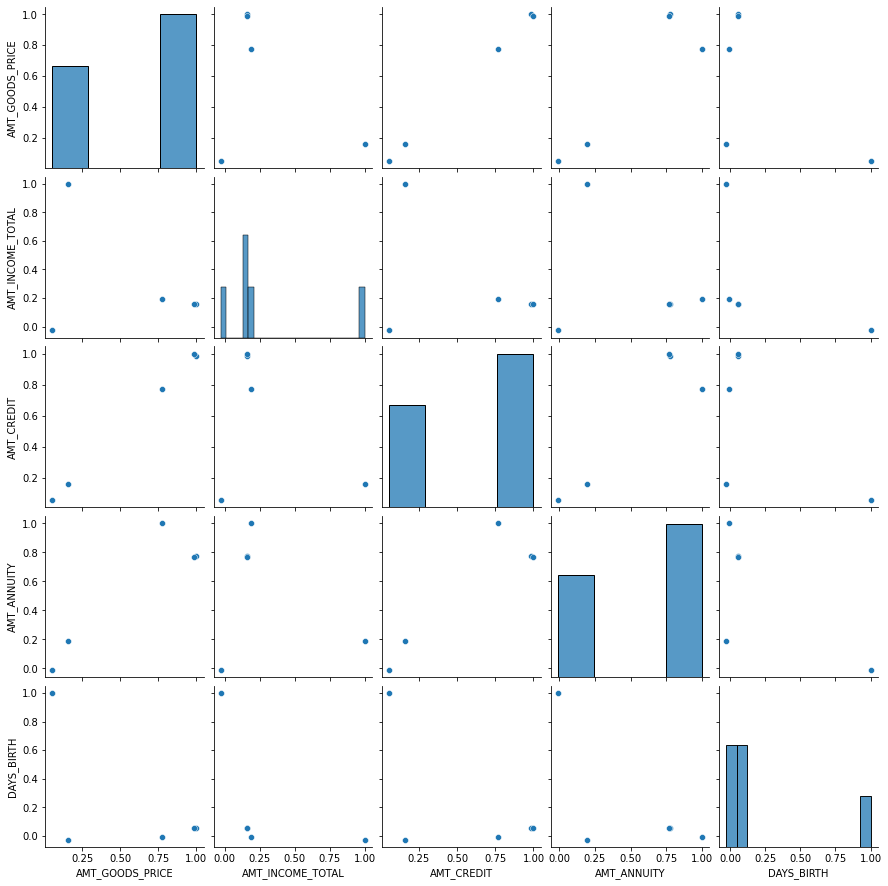

In [ ]:
sns.pairplot(data=cat3_df)

#Handling Outliers

####NAME_INCOME_TYPE


In [ ]:
#Checking outliers for INCOME
new_df.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


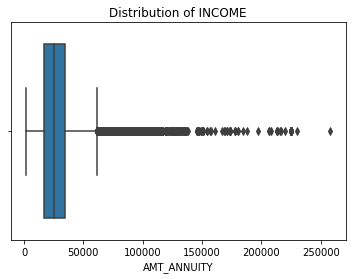

In [ ]:
sns.boxplot(new_df.INCOME)
plt.title('Distribution of NAME_INCOME_TYPE ')
plt.show()

In [ ]:
new_df.INCOME.quantile([0.5, 0.7, 0.9,0.95,0.99])

AttributeError: ignored

#AMT_ANNUITY

In [ ]:
#Checking outliers for Loan Amount
new_df.AMT_ANNUITY.describe()

count    211108.000000
mean      27793.198221
std       14622.071200
min        1980.000000
25%       17077.500000
50%       25836.750000
75%       35586.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


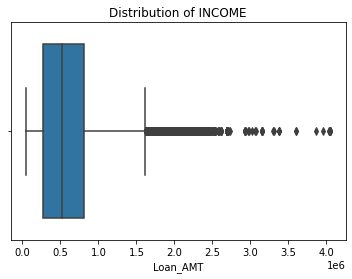

In [ ]:
sns.boxplot(new_df.AMT_ANNUITY)
plt.title('Distribution of INCOME')
plt.show()

In [ ]:
#Filterring data on bases of Laon amount for top 10 loan amounts
df_amt=new_con_df.nlargest(10,columns='AMT_ANNUITY')
df_amt.head()

,TARGET,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,AMT_ANNUITY,DAYS_REGISTRATION,DAYS_BIRTH,EXT_SOURCE_2,SK_ID_CURR
17948,0,0.009549,4050000.0,783000.0,4050000.0,4722,201,258025.5,1529.0,15176,0.706927,120926
101508,0,0.002506,2250000.0,1575000.0,2303460.0,3816,2334,230161.5,2352.0,20273,0.638760,217854
12108,0,0.072508,2250000.0,1080000.0,2250000.0,4430,6281,225000.0,2788.0,15323,0.750889,114122
15501,0,0.010006,2250000.0,270000.0,2250000.0,3131,12615,225000.0,10406.0,19672,0.794677,118093
20119,0,0.032561,2250000.0,675000.0,2250000.0,4802,795,225000.0,4578.0,16004,0.649701,123467


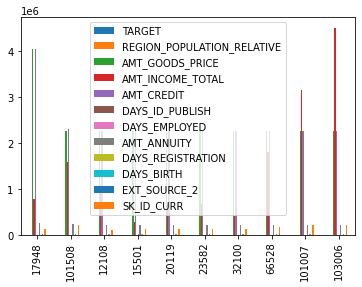

In [ ]:
#Plotting graph for approved loan amount 
df_amt.plot.bar()

#AMT_ANNUITY


In [ ]:
#Checking outliers for ANNUITY
new_df.AMT_ANNUITY.describe()

count    211108.000000
mean      27793.198221
std       14622.071200
min        1980.000000
25%       17077.500000
50%       25836.750000
75%       35586.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
new_df.shape

(211120, 42)

#AMT_GOODS_PRICE


In [ ]:
#Checking outliers for GOODS_PRICE
new_df.AMT_GOODS_PRICE.describe()

count    2.108990e+05
mean     5.481799e+05
std      3.723453e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      6.885000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

#Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable).


In [ ]:
new_df.TARGET.unique()

array([1, 0])

In [ ]:
r=new_df.TARGET.value_counts()
r

0    282686
1     24825
Name: TARGET, dtype: int64

<BarContainer object of 2 artists>

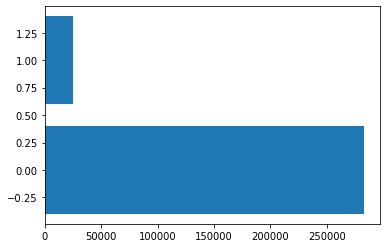

In [ ]:
plt.barh(r.index, r)

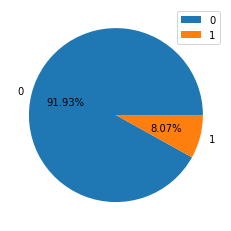

In [ ]:
plt.pie(x=r, labels=r.index, autopct='%1.2f%%')
plt.legend()
plt.show()

##Conclustion:: 8.07% of people have payment difficulty

In [ ]:
cat_df.head()

,Cust_ID,INCOME,Loan_AMT,ANNUITY,GOODS_PRICE
0,100002,202500.0,406597.5,24700.5,351000.0
1,100003,270000.0,1293502.5,35698.5,1129500.0
2,100004,67500.0,135000.0,6750.0,135000.0
3,100006,135000.0,312682.5,29686.5,297000.0
4,100007,121500.0,513000.0,21865.5,513000.0


# Binary Logistic Regression(taking into account Target as response variable)


General Regression::
at least 1 catagorical predictor(we create dummy var) and respoce is continues(we have target variable as catogorical data)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
mydf=new_df[['SK_ID_CURR','TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(mydf.drop('TARGET', axis=1), mydf.TARGET, test_size=0.2)


#checking for Target var vs Income

In [ ]:
#Income of client vs Target
x = mydf[['AMT_INCOME_TOTAL']]
y=mydf[['TARGET']]

In [ ]:
x=sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x

,const,AMT_INCOME_TOTAL
0,1.0,202500.0
1,1.0,270000.0
2,1.0,67500.0
3,1.0,135000.0
4,1.0,121500.0
...,...,...
211115,1.0,153000.0
211116,1.0,157500.0
211117,1.0,153000.0
211118,1.0,171000.0


In [ ]:
mod = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.297451
         Iterations 7


In [ ]:
print(mod.summary())   

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               211120
Model:                          Logit   Df Residuals:                   211118
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Jan 2023   Pseudo R-squ.:               0.0002871
Time:                        14:54:40   Log-Likelihood:                -62798.
converged:                       True   LL-Null:                       -62816.
Covariance Type:            nonrobust   LLR p-value:                 1.908e-09
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2572      0.016   -140.134      0.000      -2.289      -2.226
AMT_INCOME_TOTAL -4.791e-07   8.26e-08     -5.800      0.000   -6.41e-07   -3.17e-07


#p=value is <0.05 so Ho is rejected and it means that Income affect the person will default or not on loan repayment

#checking for Target var vs Loan_AMT

In [ ]:
x = mydf[['AMT_CREDIT']]
y=mydf[['TARGET']]


In [ ]:
x=sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x

,const,AMT_CREDIT
0,1.0,406597.5
1,1.0,1293502.5
2,1.0,135000.0
3,1.0,312682.5
4,1.0,513000.0
...,...,...
211115,1.0,331920.0
211116,1.0,254700.0
211117,1.0,677664.0
211118,1.0,370107.0


In [ ]:
mod1 = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.296661
         Iterations 6


In [ ]:
print(mod1.summary()) 

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               211120
Model:                          Logit   Df Residuals:                   211118
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Jan 2023   Pseudo R-squ.:                0.002943
Time:                        14:56:30   Log-Likelihood:                -62631.
converged:                       True   LL-Null:                       -62816.
Covariance Type:            nonrobust   LLR p-value:                 2.197e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1153      0.014   -152.619      0.000      -2.142      -2.088
AMT_CREDIT -3.841e-07   2.05e-08    -18.708      0.000   -4.24e-07   -3.44e-07


#p=value is <0.05 so Ho is rejected and it means that Loan_AMT  affect the person will default or not on loan repayment